## Web Scrapping Dog Database

The objective of this 

### Libraries

In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
import io
from PIL import Image
import time

dogs_ig = [
    '@itsdougthepug',
    '@jiffpom',
    '@marniethedog',
    '@manny_the_frenchie',
    '@crusoe_dachshund',
    '@samsonthedood',
    '@reagandoodle',
    '@barkleysircharles',
    '@popeyethefoodie',
    '@izzythe.frenchie',
    '@tunameltsmyheart',
    '@toastmeetsworld',
    '@mensweardog',
    '@thiswildidea',
    '@aspenthemountainpup',
    '@dogwithsign',
    '@goldenunicornrae',
    '@jackson_the_dalmatian',
    '@madmax_fluffyroad',
    '@pavlovthecorgi',
    '@tuckerbudzyn',
    '@ppteamkler',
    '@Theladyshortcake',
    '@rocco_roni',
    '@Chompersthecorgi',
    '@siberianhusky_jax',
    '@good.boy.ollie',
    '@bluestaffyboulder',
    '@lecorgi',
    '@carterchowchow'

]


In [17]:

def get_images_from_google(wd, query, delay, max_images):

	def scroll_down(wd):
		wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
		time.sleep(delay)

	query = query.replace('@', '')
	
	url = f"https://www.google.com/search?q={query}&tbm=isch"
	wd.get(url)

	image_urls = set()
	skips = 0

	while len(image_urls) + skips < max_images:
		scroll_down(wd)

		thumbnails = wd.find_elements(By.CLASS_NAME, "Q4LuWd")

		for img in thumbnails[len(image_urls) + skips:max_images]:
			try:
				img.click()
				time.sleep(delay)
			except:
				continue

			images = wd.find_elements(By.CLASS_NAME, "sFlh5c")
			for image in images:
				if image.get_attribute('src') in image_urls:
					max_images += 1
					skips += 1
					break

				if image.get_attribute('src') and 'http' in image.get_attribute('src'):
					image_urls.add(image.get_attribute('src'))
					print(f"Found {len(image_urls)}")

	return image_urls


def download_image(download_path, url, file_name):
	try:
		image_content = requests.get(url).content
		image_file = io.BytesIO(image_content)
		image = Image.open(image_file)
		file_path = download_path + file_name

		with open(file_path, "wb") as f:
			image.save(f, "JPEG")

		print("Success")
	except Exception as e:
		print('FAILED -', e)




def download_dogs_images(wd, dogs_ig, delay, max_images):
	for dog in dogs_ig:
		query = dog
		urls = get_images_from_google(wd, query, delay, max_images)

		for i, url in enumerate(urls):
			download_image("imgs/", url, str(dog) + str(i) + ".jpg")

In [19]:
print(dogs_ig[24:])

['@Chompersthecorgi', '@siberianhusky_jax', '@good.boy.ollie', '@bluestaffyboulder', '@lecorgi', '@carterchowchow']


Found 1
Found 2
Found 3
Found 4
Found 5
Found 6
Found 7
Found 8
Found 9
Found 10
Found 11
Found 12
Found 13
Found 14
Success
Success
Success
Success
Success
Success
Success
Success
FAILED - cannot write mode RGBA as JPEG
Success
Success
Success
Success
Success
Found 1
Found 2
Found 3
Found 4
Found 5
Found 6
Found 7
Found 8
Found 9
Found 10
Found 11
Found 12
Found 13
Success
Success
Success
FAILED - cannot write mode P as JPEG
Success
Success
Success
Success
Success
Success
Success
Success
Success
Found 1
Found 2
Found 3
Found 4
Found 5
Found 6
Found 7
Found 8
Found 9
Found 10
Found 11
Found 12
Success
Success
Success
Success
Success
Success
Success
Success
FAILED - No connection adapters were found for ''
Success
Success
Success
Found 1
Found 2
Found 3
Found 4
Found 5
Found 6
Found 7
Found 8
Found 9
Found 10
Found 11
Found 12
Found 13
Found 14
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
FAILED - cannot identify image file <_io
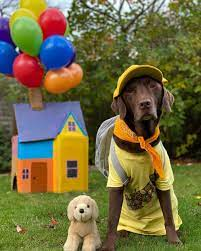

In [20]:
wd = webdriver.Chrome()
dogs_ig = dogs_ig[24:]

download_dogs_images(wd, dogs_ig, 3, 12)
